In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

import sys
sys.path.insert(0, '/Users/mariavincenzi/PhD/pycoco_2/')
import Generate_grid_INPUT as grid_input

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
TMPL_path = '/Users/mariavincenzi/PhD/pycoco_2/SNANA_GRIDs/Templates/'
pycoco_path = '/Users/mariavincenzi/PhD/pycoco_2/data/results_template/'
final_table = pd.read_csv('/Users/mariavincenzi/PhD/pycoco_2/data/info/FINAL_info.dat')[:-3]


In [4]:
final_table.head()

,Name,Type,Rich_Type,z,MW ebv,Host ebv,mjd Lbol peak,M_B,M_V,M_R,M_R_wHost,logL_BVRI,Band (Opt),Band (UV),Spectra,Ref Photometry,Ref Spectroscopy,Ref Host,Notes,SIMS
0,ASASSN14jb,II,IIP,0.0060,0.019,0,56955.18,-16.11,-16.131213,-16.484471,-16.484471,1.624080,BVgri,ubvuvw1uvw2,10,2018arXiv181111771M,2018arXiv181111771M,citet{2018arXiv181111771M},NaN,True
1,ASASSN15oz,II,IIL,0.0069,0.092,0,57269.52,-18.08,-18.159179,-18.412636,-18.412636,2.420007,UBVRIgri,ubvuvw1uvw2,14,2019arXiv190109962A,2019arXiv190109962A,citet{2019arXiv190109962A},Fast Declining,True
2,SN1993J,IIb,IIb,-0.0001,0.080,0.1,49094.44,-12.48,-12.868313,-13.084217,-12.826110,0.266357,UBVRI,NaN,49,1994AJ....107.1022R,"1995A&AS..110..513B,2000AJ....120.1487M,2000AJ...",citet{1994AJ....107.1022R},Strong CSM interactionn at late times,True
3,SN1994I,Ic,Ic,0.0015,0.035,0.3,49451.00,-16.53,-17.124966,-17.218267,-16.440148,1.919320,UBVRI,NaN,27,1996AJ....111..327R,"1995ApJ...450L..11F,1996ApJ...462..462C,2014AJ...",citet{1996AJ....111..327R},NaN,True
4,SN1998bw,Ic-BL,Ic-BL,0.0085,0.059,0,50947.00,-18.88,-19.368123,-19.324086,-19.324086,2.801150,UBVRI,NaN,23,1998Natur.395..670G,2001ApJ...555..900P,citet{2001ApJ...555..900P},NaN,True


In [5]:
peak_dicts = dict(zip(final_table.Name.values, np.array(final_table['mjd Lbol peak'].values, dtype=float)))


In [6]:
SNe_lista = final_table.Name.values[final_table.SIMS.values]
type_lista = final_table.Type.values[final_table.SIMS.values]



In [7]:
len(SNe_lista)

66

In [8]:
[i for i in zip(SNe_lista, type_lista)]

[('ASASSN14jb', 'II'),
 ('ASASSN15oz', 'II'),
 ('SN1993J', 'IIb'),
 ('SN1994I', 'Ic'),
 ('SN1998bw', 'Ic-BL'),
 ('SN1999dn', 'Ib'),
 ('SN1999em', 'II'),
 ('SN2002ap', 'Ic-BL'),
 ('SN2004aw', 'Ic'),
 ('SN2004et', 'II'),
 ('SN2004fe', 'Ic'),
 ('SN2004gq', 'Ib'),
 ('SN2004gt', 'Ic'),
 ('SN2004gv', 'Ib'),
 ('SN2005bf', 'Ib'),
 ('SN2005cs', 'II'),
 ('SN2005hg', 'Ib'),
 ('SN2006T', 'IIb'),
 ('SN2006aa', 'IIn'),
 ('SN2006aj', 'Ic-BL'),
 ('SN2006ep', 'Ib'),
 ('SN2007Y', 'Ib'),
 ('SN2007gr', 'Ic'),
 ('SN2007od', 'II'),
 ('SN2007pk', 'IIn'),
 ('SN2007ru', 'Ic-BL'),
 ('SN2007uy', 'Ib'),
 ('SN2008D', 'Ib'),
 ('SN2008aq', 'IIb'),
 ('SN2008ax', 'IIb'),
 ('SN2008bj', 'II'),
 ('SN2008bo', 'IIb'),
 ('SN2008fq', 'IIn'),
 ('SN2008in', 'II'),
 ('SN2009N', 'II'),
 ('SN2009bb', 'Ic-BL'),
 ('SN2009bw', 'II'),
 ('SN2009dd', 'II'),
 ('SN2009ib', 'II'),
 ('SN2009ip', 'IIn'),
 ('SN2009iz', 'Ib'),
 ('SN2009jf', 'Ib'),
 ('SN2009kr', 'II'),
 ('SN2010al', 'IIn'),
 ('SN2011bm', 'Ic'),
 ('SN2011dh', 'IIb'),
 ('SN2011e

In [12]:
using_hostNOTcorrected = False

In [13]:
extend_with_sudo_spec = False
phase_extended = grid_input.Phase_grid #np.arange(-25, 100, 2)
wls_fake = np.arange(1605., 11005., 5)
flux_fake = 10**-12

for sn in SNe_lista[:]:
    print (sn)
    header = """### %s.SED ###
### Mangled with pycoco, corrected for Host Extinction and MW
### %i-%i-%i, M. Vincenzi
"""%(sn, time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday) 
    header_noHostCorr = """### %s.SED ###
### Mangled with pycoco, NOT corrected for Host Extinction, corrected for MW
### %i-%i-%i, M. Vincenzi
"""%(sn, time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday) 

    if using_hostNOTcorrected:
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/HostNotCorr/'%(sn)
    else: 
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/'%(sn)
        
    final_spectra = [f for f in os.listdir(final_spectra_path) \
                         if os.path.isfile(os.path.join(final_spectra_path, f))&('.txt' in f)]
    peak = peak_dicts[sn]
    mjds = np.array([f[:8] for f in final_spectra], dtype=float)
    phase = mjds-peak
    
    if using_hostNOTcorrected:
        fout = open(TMPL_path+'/PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%sn, 'w')
        fout.write(header_noHostCorr)
    else:
        fout = open(TMPL_path+'/PyCoCo/pycoco_%s.SED'%sn, 'w')
        fout.write(header)

    
    if not extend_with_sudo_spec:
        phase_extended = phase
    
    for ph in phase_extended[phase_extended<min(phase)]:
        for w in wls_fake:
            fout.write('%.2f\t%.2f\t%.2E\n'%(ph,w,flux_fake))
    for ph,s in zip(phase, final_spectra):
        spec = pd.read_csv(final_spectra_path+s, delimiter='\t')
        resample_flux = np.interp(wls_fake, spec['#wls'].values, spec['flux'].values,
             right=np.nan, left=np.nan)
        resample_fluxerr = np.interp(wls_fake, spec['#wls'].values, spec['fluxerr'].values,
             right=np.nan, left=np.nan)
        resample_spec = pd.DataFrame.from_items(zip(spec.columns,[wls_fake, resample_flux, resample_fluxerr])).dropna()

        if max(resample_spec['#wls']<11000):
            wls_ext = wls_fake[wls_fake>max(resample_spec['#wls'])]
            flux_ext = np.ones(len(wls_ext))*flux_fake
            flux_err_ext = np.ones(len(wls_ext))*flux_fake
            extend_spec = resample_spec.append(pd.DataFrame.from_items(zip(resample_spec.columns,
                                                                  [wls_ext, flux_ext, flux_err_ext])), ignore_index=True)
        else:
            extend_spec = resample_spec.copy()
        if min(resample_spec['#wls']>min(wls_fake)): 
            print (sn, 'MIN', min(resample_spec['#wls']))
        extend_spec['phase']=ph
        for p,w,f in extend_spec[['phase', '#wls','flux']].values:
            fout.write('%.2f %.2f %.2E\n'%(p,w,f))
    for ph in phase_extended[phase_extended>max(phase)]:
        for w in wls_fake:
            fout.write('%.2f %.2f %.2E\n'%(ph,w,flux_fake))

    fout.close()

ASASSN14jb
ASASSN15oz
SN1993J
SN1994I
SN1998bw
SN1999dn
SN1999em
SN2002ap
SN2004aw
SN2004et
SN2004fe
SN2004gq
SN2004gt
SN2004gv
SN2005bf
SN2005cs
SN2005hg
SN2006T
SN2006aa
SN2006aj
SN2006ep
SN2007Y
SN2007gr
SN2007od
SN2007pk
SN2007ru
SN2007uy
SN2008D
SN2008aq
SN2008ax
SN2008bj
SN2008bo
SN2008fq
SN2008in
SN2009N
SN2009bb
SN2009bw
SN2009dd
SN2009ib
SN2009ip
SN2009iz
SN2009jf
SN2009kr
SN2010al
SN2011bm
SN2011dh
SN2011ei
SN2011fu
SN2011hs
SN2011ht
SN2012A
SN2012ap
SN2012au
SN2012aw
SN2013ab
SN2013am
SN2013by
SN2013df
SN2013ej
SN2013fs
SN2013ge
SN2014G
SN2016X
SN2016bkv
SN2016gkg
iPTF13bvn


In [14]:
for sn in SNe_lista:
    if using_hostNOTcorrected:
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/HostNotCorr/'%(sn)
    else: 
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/'%(sn)
    final_spectra = [f for f in os.listdir(final_spectra_path) \
                         if os.path.isfile(os.path.join(final_spectra_path, f))&('.txt' in f)]
    peak = peak_dicts[sn]
    
    mjds = np.array([f[:8] for f in final_spectra], dtype=float)
    phase = mjds-peak
    print (sn, peak, min(phase), max(phase))

ASASSN14jb 56955.18 -5.029999999998836 193.0500000000029
ASASSN15oz 57269.52 0.0 203.0
SN1993J 49094.44 -10.440000000002328 191.34999999999854
SN1994I 49451.0 -5.610000000000582 199.37999999999738
SN1998bw 50947.0 -15.19999999999709 122.59999999999854
SN1999dn 51418.01 -2.970000000001164 206.34999999999854
SN1999em 51483.08 -2.0800000000017462 199.5699999999997
SN2002ap 52314.11 -8.419999999998254 195.22999999999593
SN2004aw 53090.01 -4.92000000000553 206.00999999999476
SN2004et 53284.5 -5.5 243.5
SN2004fe 53318.19 -6.690000000002328 140.88999999999942
SN2004gq 53360.23 -9.230000000003201 153.8199999999997
SN2004gt 53361.77 -4.189999999995052 196.74000000000524
SN2004gv 53366.62 -10.42000000000553 129.39999999999418
SN2005bf 53497.0 -30.0 168.94000000000233
SN2005cs 53553.5 -2.779999999998836 196.75
SN2005hg 53683.0 -12.739999999997963 201.1600000000035
SN2006T 53781.25 -12.889999999999418 189.7699999999968
SN2006aa 53818.0 -37.56999999999971 162.15000000000146
SN2006aj 53794.15 -6.040

In [15]:
#for sn in SNe_lista:
#    snana_templ = np.genfromtxt(TMPL_path+'pycoco_%s.SED'%sn)
#    print ('°°°°',sn)
#    print (min(snana_templ[:,0]),max(snana_templ[:,0]))
#    print (min(snana_templ[:,1]),max(snana_templ[:,1]))
#    print (min(snana_templ[:,2]),max(snana_templ[:,2]))

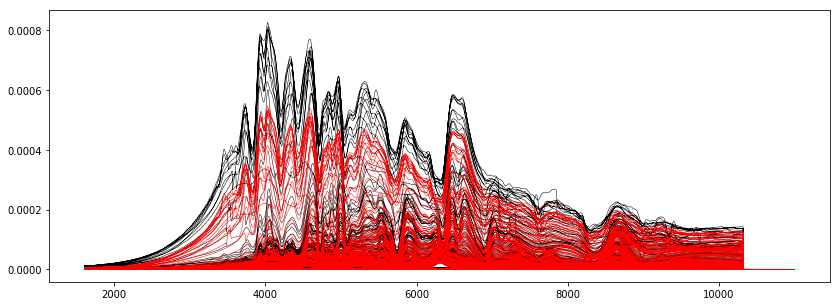

In [16]:
snana_templ = np.genfromtxt(TMPL_path+'PyCoCo/pycoco_%s.SED'%'SN1993J')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)


snana_templ = np.genfromtxt(TMPL_path+'PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%'SN1993J')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='r',lw=0.5)



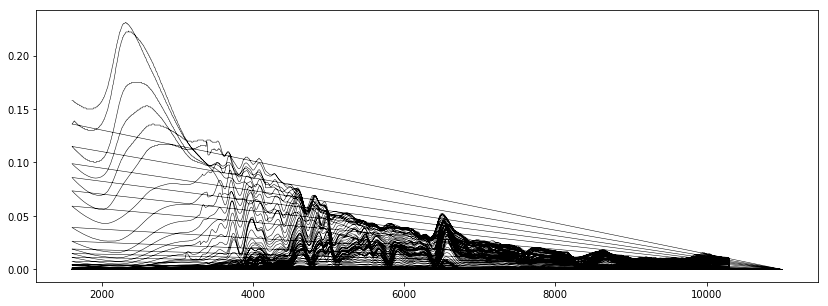

In [17]:
snana_templ = np.genfromtxt(TMPL_path+'PyCoCo/pycoco_%s.SED'%'SN2013ej')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)



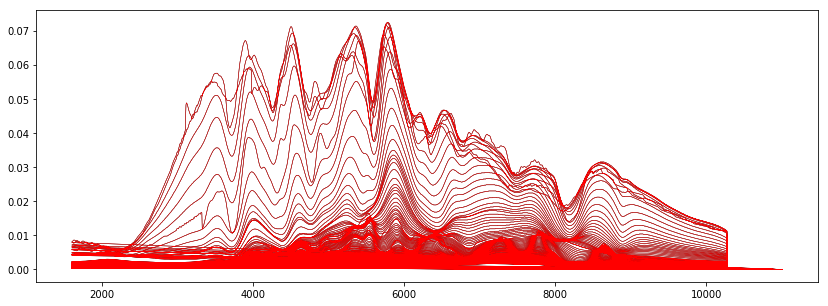

In [18]:
snana_templ = np.genfromtxt(TMPL_path+'PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%'SN2012au')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)

snana_templ = np.genfromtxt(TMPL_path+'PyCoCo/pycoco_%s.SED'%'SN2012au')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='r',lw=0.5)




In [19]:
#for sn in SNe_lista:
print ('scp -r PyCoCo mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/')
print ('scp -r PyCoCo_noHostCorr mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/\n')


scp -r PyCoCo mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/
scp -r PyCoCo_noHostCorr mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/



In [18]:
print ('scp PyCoCo/pycoco_SN2012au.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo/')
print ('scp PyCoCo_noHostCorr/pycoco_SN2012au_noHostCorr.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo_noHostCorr/')



scp PyCoCo/pycoco_SN2012au.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo/
scp PyCoCo_noHostCorr/pycoco_SN2012au_noHostCorr.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo_noHostCorr/


In [19]:
#for sn in SNe_lista:
print ('scp -r PyCoCo mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A')
print ('scp -r PyCoCo_noHostCorr mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A')



scp -r PyCoCo mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A
scp -r PyCoCo_noHostCorr mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A


# CREATE FILE .INPUT

In [8]:
import pandas as pd
PYCOCO_PATH = "/Users/mariavincenzi/PhD/pycoco_2/"
table = pd.read_csv(PYCOCO_PATH+'/data/info/FINAL_info.dat').dropna(axis=0, subset=['M_B'])

table_cut = pd.DataFrame(columns=table.columns) 
for i, row in table.iterrows():
    if row['Name'] in SNe_lista:
        table_cut.loc[i] = row
        
LF_sim = 'J17L10'
mode = 'GLOBAL'

if LF_sim=='R14':
    AbsMag_column = 'M_B'
    LF_dict_global = grid_input.Rich_LF_glob 
    LF_dict_shiftxtmpl = grid_input.Rich_LF
    Rates_dict = grid_input.RatesRi_dict 
    Type_column = 'Rich_Type'
    file_suffix = ''
    delta_index=700
    Ho_correction = 0.
    
elif LF_sim=='L10':
    AbsMag_column = 'M_R_wHost'
    LF_dict_global = grid_input.LiREVISED_LF_glob 
    LF_dict_shiftxtmpl = grid_input.LiREVISED_LF
    Rates_dict = grid_input.RatesLiREVISED_dict 
    Type_column = 'Type'
    file_suffix = '_noHostCorr'
    delta_index=800
    #import astropy.cosmology as cosmo
    #h07 = cosmo.FlatLambdaCDM(H0=70, Om0=0.3)
    #h073 = cosmo.FlatLambdaCDM(H0=73, Om0=0.3)
    Ho_correction = 0.#h073.distmod(z=0.001).value-h07.distmod(z=0.001).value

elif LF_sim=='J17L10':
    AbsMag_column = 'M_R_wHost'
    LF_dict_shiftxtmpl = grid_input.Li_adjustedJ17
    LF_dict_global = grid_input.Li_adjustedJ17_global
    Rates_dict = grid_input.RatesL10J17_dict 
    Type_column = 'Type'
    file_suffix = '_noHostCorr'
    delta_index=800
    Ho_correction = 0.#h073.distmod(z=0.001).value-h07.distmod(z=0.001).value


In [9]:
weighted_Rates= {}
for typ in Rates_dict.keys():
    try:
        tmpl_x_type = table_cut[['Name', Type_column]].groupby(Type_column).count()['Name'][typ]
        print (typ, tmpl_x_type, Rates_dict[typ], Rates_dict[typ]/tmpl_x_type)
        weighted_Rates[typ]=Rates_dict[typ]/tmpl_x_type
    except KeyError:
        weighted_Rates[typ]=0


IIn 6 6.35 1.0583333333333333
Ic-BL 6 1.0 0.16666666666666666
Ic 7 14.0 2.0
II 23 56.0 2.4347826086956523
IIb 11 8.5 0.7727272727272727
Ib 13 14.0 1.0769230769230769


II       23
Ib       13
IIb      11
Ic        7
IIn       6
Ic-BL     6
Name: Type, dtype: int64


Text(0.5,1,'TOTAL:66')

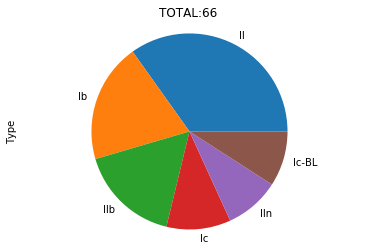

In [10]:
table_cut[Type_column].value_counts().plot(kind='pie')
plt.axis('equal')
print (table_cut[Type_column].value_counts())
plt.title('TOTAL:'+str(len(table_cut)))

In [11]:
weighted_Rates= {}
for typ in Rates_dict.keys():
    try:
        tmpl_x_type = table_cut[['Name', Type_column]].groupby(Type_column).count()['Name'][typ]
        print (typ, tmpl_x_type, Rates_dict[typ], Rates_dict[typ]/tmpl_x_type)
        weighted_Rates[typ]=Rates_dict[typ]/tmpl_x_type
    except KeyError:
        weighted_Rates[typ]=0

        
weighted_Rates_list = []
for tmpl in table_cut['Name']:
    tmpl_type = table_cut[table_cut.Name.values==tmpl][Type_column].values[0]
    weighted_Rates_list.append(weighted_Rates[tmpl_type])

IIn 6 6.35 1.0583333333333333
Ic-BL 6 1.0 0.16666666666666666
Ic 7 14.0 2.0
II 23 56.0 2.4347826086956523
IIb 11 8.5 0.7727272727272727
Ib 13 14.0 1.0769230769230769


In [12]:
for n,r,t in zip(table_cut['Name'], table_cut[Type_column], weighted_Rates_list):
    print (n,r,t)

ASASSN14jb II 2.4347826086956523
ASASSN15oz II 2.4347826086956523
SN1993J IIb 0.7727272727272727
SN1994I Ic 2.0
SN1998bw Ic-BL 0.16666666666666666
SN1999dn Ib 1.0769230769230769
SN1999em II 2.4347826086956523
SN2002ap Ic-BL 0.16666666666666666
SN2004aw Ic 2.0
SN2004et II 2.4347826086956523
SN2004fe Ic 2.0
SN2004gq Ib 1.0769230769230769
SN2004gt Ic 2.0
SN2004gv Ib 1.0769230769230769
SN2005bf Ib 1.0769230769230769
SN2005cs II 2.4347826086956523
SN2005hg Ib 1.0769230769230769
SN2006T IIb 0.7727272727272727
SN2006aa IIn 1.0583333333333333
SN2006aj Ic-BL 0.16666666666666666
SN2006ep Ib 1.0769230769230769
SN2007Y Ib 1.0769230769230769
SN2007gr Ic 2.0
SN2007od II 2.4347826086956523
SN2007pk IIn 1.0583333333333333
SN2007ru Ic-BL 0.16666666666666666
SN2007uy Ib 1.0769230769230769
SN2008D Ib 1.0769230769230769
SN2008aq IIb 0.7727272727272727
SN2008ax IIb 0.7727272727272727
SN2008bj II 2.4347826086956523
SN2008bo IIb 0.7727272727272727
SN2008fq IIn 1.0583333333333333
SN2008in II 2.434782608695652

In [32]:
mag_smear_list = []
mag_off_list = []
for tmpl in table_cut.Name.values:
    tmpl_type = table_cut[table_cut.Name.values==tmpl][Type_column].values[0]
    tmpl_Mag = table_cut[table_cut.Name.values==tmpl][AbsMag_column].values[0]
        
    if (mode=='GLOBAL')&(~np.isnan(LF_dict_global[tmpl_type][0])):
        if (tmpl=='SN1993J'):  additional_shift = -2.5
        elif (tmpl=='SN2011bm'):  additional_shift = -1.5
        elif ((tmpl=='SN1998bw')|(tmpl=='SN2007ru')|(tmpl=='SN2009bb')): additional_shift = +1.
        elif (tmpl in ['SN2005cs','SN1999em', 'SN2009N','SN2013am', 'SN2009ib']): additional_shift=-1.5
        elif (tmpl in ['SN2013by','SN2014G','ASSASN15oz','SN2007od','SN2013fs']): additional_shift=+0.
        else: additional_shift=0.
        mag_off_list.append(LF_dict_global[tmpl_type][0] +additional_shift)
        mag_smear_list.append(LF_dict_global[tmpl_type][1])
        #print (tmpl, tmpl_type, '%.2f'%tmpl_Mag, '%.2f'%(LF_dict[tmpl_type][0]))
        #print (tmpl_type,'%.2f'%(LF_dict[tmpl_type][0]))
    else:
        mag_off_list.append(-tmpl_Mag + LF_dict_shiftxtmpl[tmpl_type][0] +Ho_correction)
        mag_smear_list.append(LF_dict_shiftxtmpl[tmpl_type][1])
        #print (tmpl, tmpl_type, '%.2f'%tmpl_Mag, '%.2f'%(-tmpl_Mag + grid_input.LF_dict[tmpl_type][0]))

##############
## REMEMBER:

# SN2011bm -1.5
# SN1993J -1.

##############

In [33]:
#SNTYPE  20  => II+IIP       (WGTSUM= 0.590)
#SNTYPE  21  => IIn+IIN      (WGTSUM= 0.040)
#SNTYPE  22  => IIL          (WGTSUM= 0.080)
#SNTYPE  23  => IIb          (WGTSUM= 0.)
#SNTYPE  32  => Ib           (WGTSUM= 0.140)
#SNTYPE  33  => Ic+Ibc       (WGTSUM= 0.150)
#SNTYPE  34  => Ic-BL       (WGTSUM= 0.150)

In [34]:
dict_SNANINdex2type = {'IIP': 20, 'Ib': 32, 'Ic':33,
                      'Ibc-pec':34,'Ic-BL':35, 'IIb': 23,
                       'IIn':21, 'IIL':22, 'II':25}

In [35]:
table_cut['GRID-INDEX'] = table_cut.index.values
table_cut['SNANA-INDEX'] = table_cut.index.values+delta_index#[dict_SNANINdex2type[t] for t in table_cut[Type_column].values]
#table_cut['TYPE'] = [t.replace('-','') for t in table_cut[Type_column].values]
table_cut['TYPE_NAME'] = [t for t in table_cut[Type_column].values]
table_cut['TYPE'] = [dict_SNANINdex2type[t] for t in table_cut[Type_column].values]
table_cut['MAGOFF'] = mag_off_list
table_cut['MAGSMEAR'] = mag_smear_list
table_cut['WGT'] = np.array(weighted_Rates_list)/sum(weighted_Rates_list)

In [36]:
grid_table = (table_cut[['GRID-INDEX', 'SNANA-INDEX', 'TYPE' , 'TYPE_NAME' , 'Name', 'WGT', 'MAGOFF', 'MAGSMEAR']]).copy()
grid_table.columns = ['GRID-INDEX', 'SNANA-INDEX', 'TYPE' , 'TYPE_NAME' , 'NAME', 'WGT', 'MAGOFF', 'MAGSMEAR']

In [37]:
grid_table.index = ['NON1A:' for i in grid_table.index.values]

In [38]:
grid_table.sort_index(by='TYPE', inplace=True)

/Users/mariavincenzi/anaconda2_7/envs/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


In [39]:
grid_table['COMM_TYPE'] = ['## '+t for t in grid_table.TYPE_NAME.values]


In [40]:
pd.set_option('display.max_rows', 1000)

header = """NON1A_KEYS: 5
         INDEX   WGT    MAGOFF   MAGSMEAR  SNTYPE
"""
#example
#NON1A:    201   0.0207   1.300     0.740     20    # IIP  (SDSS-000018)
print (header)
print (str(grid_table[['SNANA-INDEX', 'WGT', 'MAGOFF', 'MAGSMEAR', 'TYPE', 'COMM_TYPE', 'NAME']]))

#for i,row in (grid_table[['SNANA-INDEX', 'WGT', 'MAGOFF', 'MAGSMEAR', 'TYPE']]).iterrows():
#    print ('NON1A:    ',str(row.values)[1:-1])
print ("""
PEC1A:    502   0.25   -17.447     0.5250     42    # Ia-91bg  (Nugent)
PEC1A:    503   0.25    -0.030     0.5250     42    # Ia-91bg  (LOWZ-1999by)
PEC1A:    506   0.25    -0.030     0.5250     42    # Ia-91bg  (LOWZ-1998de)
PEC1A:    509   0.25    -0.030     0.5250     42    # Ia-91bg  (LOWZ-2005bl)
""")

NON1A_KEYS: 5
         INDEX   WGT    MAGOFF   MAGSMEAR  SNTYPE

        SNANA-INDEX       WGT    MAGOFF  MAGSMEAR  TYPE COMM_TYPE        NAME
NON1A:          832  0.010599  0.425425  1.076755    21    ## IIn    SN2008fq
NON1A:          824  0.010599  0.869560  1.076755    21    ## IIn    SN2007pk
NON1A:          839  0.010599  0.688638  1.076755    21    ## IIn    SN2009ip
NON1A:          843  0.010599  0.836917  1.076755    21    ## IIn    SN2010al
NON1A:          818  0.010599 -0.066573  1.076755    21    ## IIn    SN2006aa
NON1A:          849  0.010599 -0.854033  1.076755    21    ## IIn    SN2011ht
NON1A:          829  0.007739 -0.650000  0.000000    23    ## IIb    SN2008ax
NON1A:          828  0.007739 -0.650000  0.000000    23    ## IIb    SN2008aq
NON1A:          845  0.007739 -0.650000  0.000000    23    ## IIb    SN2011dh
NON1A:          817  0.007739 -0.650000  0.000000    23    ## IIb     SN2006T
NON1A:          831  0.007739 -0.650000  0.000000    23    ## IIb    SN2008bo

In [23]:
# -----------------------------------------
#   NSED(NON1A): 5
#
# User-generated comments:
#   MAGOFF and MAGSMEAR adjusted to match m_R peak and sigma
#   in Table 6 of Li et al, 2010 (arXiv:1006.4612)

#SNTYPE  20  => II+IIP       (WGTSUM= 0.590)
#SNTYPE  21  => IIn+IIN      (WGTSUM= 0.040)
#SNTYPE  22  => IIL          (WGTSUM= 0.080)
#SNTYPE  32  => Ib           (WGTSUM= 0.140)
#SNTYPE  33  => Ic+Ibc       (WGTSUM= 0.150)


In [98]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('expand_frame_repr', False)
grid_table['FILE'] = ['$SNDATA_ROOT/snsed/NON1A/PyCoCo%s/pycoco_%s%s.SED'%(file_suffix, sn, file_suffix) for sn in grid_table.NAME]
print (str(grid_table[['SNANA-INDEX', 'TYPE_NAME', 'FILE']]))


        SNANA-INDEX TYPE_NAME                                                   FILE
NON1A:          700       IIP  $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_ASASSN14jb.SED
NON1A:          734       IIP     $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2009N.SED
NON1A:          715       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2005cs.SED
NON1A:          736       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2009bw.SED
NON1A:          738       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2009ib.SED
NON1A:          733       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2008in.SED
NON1A:          750       IIP     $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2012A.SED
NON1A:          709       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2004et.SED
NON1A:          706       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN1999em.SED
NON1A:          754       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/pycoco_SN2013ab.SED
NON1A:          755       IIP    $SNDATA_ROOT/snsed/NON1A/PyCoCo/

In [99]:


peak_dicts

#dict(zip( table_cut.Name, table_cut.MAGOFF))

{'ASASSN14jb': 56955.18,
 'ASASSN15oz': 57269.52,
 'SN1993J': 49094.44,
 'SN1994I': 49451.0,
 'SN1998bw': 50947.0,
 'SN1999dn': 51418.01,
 'SN1999em': 51483.08,
 'SN2002ap': 52314.11,
 'SN2004aw': 53090.01,
 'SN2004et': 53284.5,
 'SN2004fe': 53318.19,
 'SN2004gq': 53360.23,
 'SN2004gt': 53361.77,
 'SN2004gv': 53366.62,
 'SN2005bf': 53497.0,
 'SN2005cs': 53553.5,
 'SN2005hg': 53683.0,
 'SN2006T': 53781.25,
 'SN2006aa': 53818.0,
 'SN2006aj': 53794.15,
 'SN2006ep': 53988.35,
 'SN2007Y': 54165.33,
 'SN2007gr': 54338.0,
 'SN2007od': 54410.0,
 'SN2007pk': 54423.62,
 'SN2007ru': 54437.0,
 'SN2007uy': 54481.99,
 'SN2008D': 54494.0,
 'SN2008aq': 54526.4,
 'SN2008ax': 54550.0,
 'SN2008bj': 54552.0,
 'SN2008bo': 54570.5,
 'SN2008fq': 54731.0,
 'SN2008in': 54831.95,
 'SN2009N': 54859.64,
 'SN2009bb': 54921.5,
 'SN2009bw': 54925.21,
 'SN2009dd': 54936.0,
 'SN2009ib': 55056.28,
 'SN2009ip': 56206.19,
 'SN2009iz': 55107.58,
 'SN2009jf': 55121.17,
 'SN2009kr': 55148.75,
 'SN2010al': 55284.0,
 'SN2011b

In [100]:
table_cut

,Name,Type,Rich_Type,z,MW ebv,Host ebv,mjd Lbol peak,M_B,M_V,M_R,...,Ref Host,Notes,SIMS,GRID-INDEX,SNANA-INDEX,TYPE_NAME,TYPE,MAGOFF,MAGSMEAR,WGT
0,ASASSN14jb,II,IIP,0.0060,0.019,0,56955.18,-16.11,-16.131213,-16.484471,...,citet{2018arXiv181111771M},NaN,True,0,700,IIP,20,-0.40,0.40,0.030940
1,ASASSN15oz,II,IIL,0.0069,0.092,0,57269.52,-18.08,-18.159179,-18.412636,...,citet{2019arXiv190109962A},NaN,True,1,701,IIL,22,-0.35,0.65,0.013135
2,SN1993J,IIb,IIb,-0.0001,0.080,0.1,49094.44,-12.48,-12.868313,-13.084217,...,citet{1994AJ....107.1022R},Strong CSM interactionn at late times,True,2,702,IIb,23,-3.15,0.50,0.019901
3,SN1994I,Ic,Ic,0.0015,0.035,0.3,49451.00,-16.53,-17.124966,-17.218267,...,citet{1996AJ....111..327R},NaN,True,3,703,Ic,33,-1.05,0.70,0.009382
4,SN1998bw,Ic-BL,Ic-BL,0.0085,0.059,0,50947.00,-18.88,-19.368123,-19.324086,...,citet{2001ApJ...555..900P},NaN,True,4,704,Ic-BL,35,-0.05,0.70,0.001605
5,SN1999dn,Ib,Ib,0.0093,0.052,0.05,51418.01,-16.67,-17.227860,-17.399419,...,citet{2011MNRAS.411.2726B},NaN,True,5,705,Ib,32,-0.15,0.95,0.007409
6,SN1999em,II,IIP,0.0024,0.041,0.08,51483.08,-16.73,-16.628108,-16.818719,...,citet{2009AJ....137...34K},NaN,True,6,706,IIP,20,-0.40,0.40,0.030940
7,SN2002ap,Ic-BL,Ic-BL,0.0022,0.072,0.01,52314.11,-17.07,-17.712265,-17.772589,...,citet{2003MNRAS.340..375P},NaN,True,7,707,Ic-BL,35,-1.05,0.70,0.001605
8,SN2004aw,Ic,Ic,0.0159,0.021,0.35,53090.01,-17.64,-18.058870,-18.225451,...,citet{2006MNRAS.371.1459T},Slow decline. Spectroscopically between Ic and Ic-BL,True,8,708,Ic,33,-1.05,0.70,0.009382
9,SN2004et,II,IIP,0.0010,0.342,0.07,53284.50,-16.99,-16.903877,-17.060371,...,citet{2004IAUC.8413....1Z},NaN,True,9,709,IIP,20,-0.40,0.40,0.030940


In [101]:
dict(zip( table_cut.index+delta_index, np.round(table_cut.WGT, decimals=4)))

{700: 0.0309,
 701: 0.0131,
 702: 0.0199,
 703: 0.0094,
 704: 0.0016,
 705: 0.0074,
 706: 0.0309,
 707: 0.0016,
 708: 0.0094,
 709: 0.0309,
 710: 0.0094,
 711: 0.0074,
 712: 0.0094,
 713: 0.0074,
 714: 0.0074,
 715: 0.0309,
 716: 0.0074,
 717: 0.0199,
 718: 0.0067,
 719: 0.0016,
 720: 0.0074,
 721: 0.0074,
 722: 0.0094,
 723: 0.0131,
 724: 0.0067,
 725: 0.0016,
 726: 0.0074,
 727: 0.0074,
 728: 0.0199,
 729: 0.0199,
 730: 0.0131,
 731: 0.0199,
 732: 0.0067,
 733: 0.0309,
 734: 0.0309,
 735: 0.0016,
 736: 0.0309,
 737: 0.0131,
 738: 0.0309,
 739: 0.0067,
 740: 0.0074,
 741: 0.0074,
 742: 0.0131,
 743: 0.0067,
 744: 0.0094,
 745: 0.0199,
 746: 0.0199,
 747: 0.0199,
 748: 0.0199,
 749: 0.0067,
 750: 0.0309,
 751: 0.0016,
 752: 0.0074,
 753: 0.0309,
 754: 0.0309,
 755: 0.0309,
 756: 0.0131,
 757: 0.0199,
 758: 0.0131,
 759: 0.0309,
 760: 0.0094,
 761: 0.0131,
 762: 0.0309,
 763: 0.0309,
 764: 0.0199,
 765: 0.0074}

In [ ]:
dict(zip( table_cut.index, table_cut.Name))

In [ ]:
#SIMGEN_mix_PyCC_J17.INPUT

In [ ]:
VV= '_'
for index in np.arange(0,10,1):
    #print (index)
    print ("snlc_sim.exe sim_PS1_PyCC_Rich.INPUT RANSEED %i GENVERSION PyCC_Rich%s%i"%(index*10,VV,index))
    print ("snlc_fit.exe fit_CC_Li.nml VERSION_PHOTOMETRY 'PyCC_Rich%s%i' TEXTFILE_PREFIX 'PyCC_Rich%s%i'"%(VV,index,VV,index))
    print()


In [ ]:
VV= '_SingShift_Ibcpec_'
for index in np.arange(0,10,1):
    #print (index)
    print ("snlc_sim.exe sim_PS1_CC_PycocoTmpl_Li_IbcPec.INPUT RANSEED %i GENVERSION PyCC_SED%s%i"%(index*10,VV,index))
    print ("snlc_fit.exe fit_CC_Li.nml VERSION_PHOTOMETRY 'PyCC_SED%s%i' TEXTFILE_PREFIX 'PyCC_SED%s%i'"%(VV,index,VV,index))
    print()


In [ ]:
for index in np.arange(0,10,1):
    print ('scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_SED_IbcPec_%i.FITRES.TEXT ./'%index)

In [ ]:
VV= '_'
for index in np.arange(0,16,1):
    #print (index)
    print ("snlc_sim.exe sim_PS1_IA_indip.INPUT RANSEED %i GENVERSION PyCC_IA%s%i"%(index*10,VV,index))
    print ("snlc_fit.exe fit_CC_Li.nml VERSION_PHOTOMETRY 'PyCC_IA%s%i' TEXTFILE_PREFIX 'PyCC_IA%s%i'"%(VV,index,VV,index))
    print()


In [ ]:
for index in np.arange(0,16,1):
    print ('scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_SED_IbcPec_%i/PyCC_SED_IbcPec_%i.DUMP ./'%(index,index))
    
print ('\n')

In [24]:
for index in np.arange(0,10,1):
    print ('scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_%i/PyCC_LiJ17Adjust_%i.DUMP ./'%(index,index))
print ('\n')


scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_0/PyCC_LiJ17Adjust_0.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_1/PyCC_LiJ17Adjust_1.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_2/PyCC_LiJ17Adjust_2.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_3/PyCC_LiJ17Adjust_3.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_4/PyCC_LiJ17Adjust_4.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_5/PyCC_LiJ17Adjust_5.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_6/PyCC_LiJ17Adjust_6.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/SIM/PyCC_LiJ17Adjust_7/PyCC_LiJ17Adjust_7.DUMP ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DA

In [25]:
for index in np.arange(0,10,1):
    print ('scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_%i.FITRES.TEXT ./'%(index))
print ('\n')



scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_0.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_1.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_2.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_3.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_4.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_5.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_files/PS1_pycoco/PyCC_LiJ17Adjust_6.FITRES.TEXT ./
scp mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/sample_input_fil